<a href="https://colab.research.google.com/github/fahriyegrl/bitcoin_predict_time_series_tensorflow/blob/main/bitcoin_prediction_time_series_forecasting_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Getting and downloading then Bitcoin historical data from here: https://coincodex.com/crypto/bitcoin/historical-data/

In [1]:
!wget https://github.com/fahriyegrl/bitcoin_predict_time_series_tensorflow/raw/main/bitcoin_2019-08-26_2024-08-24.csv

--2024-08-29 02:19:38--  https://github.com/fahriyegrl/bitcoin_predict_time_series_tensorflow/raw/main/bitcoin_2019-08-26_2024-08-24.csv
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fahriyegrl/bitcoin_predict_time_series_tensorflow/main/bitcoin_2019-08-26_2024-08-24.csv [following]
--2024-08-29 02:19:39--  https://raw.githubusercontent.com/fahriyegrl/bitcoin_predict_time_series_tensorflow/main/bitcoin_2019-08-26_2024-08-24.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 204004 (199K) [text/plain]
Saving to: ‘bitcoin_2019-08-26_2024-08-24.csv’

bitcoin_2019-08-26_ 100%[===================>

In [2]:
import pandas as pd

df = pd.read_csv('bitcoin_2019-08-26_2024-08-24.csv')
df.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-08-23,2024-08-24,60392.09,64851.37,60392.09,63979.97,1.096811e+11,1.218889e+12
1,2024-08-22,2024-08-23,61167.48,61379.44,59953.14,60386.02,1.099257e+11,1.197426e+12
2,2024-08-21,2024-08-22,59114.41,61813.19,58907.09,61109.99,1.094567e+11,1.180932e+12
3,2024-08-20,2024-08-21,59448.00,61315.96,58705.68,59056.01,1.036199e+11,1.185949e+12
4,2024-08-19,2024-08-20,58320.02,59562.71,57928.86,59562.71,9.317886e+10,1.157509e+12


In [3]:
df.tail()

,Start,End,Open,High,Low,Close,Volume,Market Cap
1820,2019-08-30,2019-08-31,9499.878802,9640.946925,9409.399994,9582.255358,1.614085e+10,1.709868e+11
1821,2019-08-29,2019-08-30,9755.839220,9755.839220,9388.612159,9493.755389,2.061784e+10,1.707816e+11
1822,2019-08-28,2019-08-29,10206.418980,10270.522245,9691.877126,9759.791528,1.522129e+10,1.803473e+11
1823,2019-08-27,2019-08-28,10380.720317,10380.720317,10090.229211,10219.413373,1.570331e+10,1.826662e+11
1824,2019-08-26,2019-08-27,10150.617721,10556.072516,10150.617721,10374.876617,1.716487e+10,1.852813e+11


In [4]:
df = pd.read_csv('bitcoin_2019-08-26_2024-08-24.csv',
                 parse_dates=['Start'],
                 index_col= ['Start'])
df.head()

,End,Open,High,Low,Close,Volume,Market Cap
Start,,,,,,,
2024-08-23,2024-08-24,60392.09,64851.37,60392.09,63979.97,1.096811e+11,1.218889e+12
2024-08-22,2024-08-23,61167.48,61379.44,59953.14,60386.02,1.099257e+11,1.197426e+12
2024-08-21,2024-08-22,59114.41,61813.19,58907.09,61109.99,1.094567e+11,1.180932e+12
2024-08-20,2024-08-21,59448.00,61315.96,58705.68,59056.01,1.036199e+11,1.185949e+12
2024-08-19,2024-08-20,58320.02,59562.71,57928.86,59562.71,9.317886e+10,1.157509e+12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2024-08-23 to 2019-08-26
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   End         1825 non-null   object 
 1   Open        1825 non-null   float64
 2   High        1825 non-null   float64
 3   Low         1825 non-null   float64
 4   Close       1825 non-null   float64
 5   Volume      1825 non-null   float64
 6   Market Cap  1825 non-null   float64
dtypes: float64(6), object(1)
memory usage: 114.1+ KB


In [6]:
len(df)

1825

In [91]:
bitcoin_price_reversed = df.iloc[::-1]
bitcoin_price = pd.DataFrame(bitcoin_price_reversed['Close']).rename(columns={'Close':'price'})
bitcoin_price.head()

,price
Start,
2019-08-26,10374.876617
2019-08-27,10219.413373
2019-08-28,9759.791528
2019-08-29,9493.755389
2019-08-30,9582.255358


In [92]:
bitcoin_price.index.dtype

dtype('<M8[ns]')

In [93]:
len(bitcoin_price), bitcoin_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2019-08-26 to 2024-08-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   1825 non-null   float64
dtypes: float64(1)
memory usage: 28.5 KB


(1825, None)

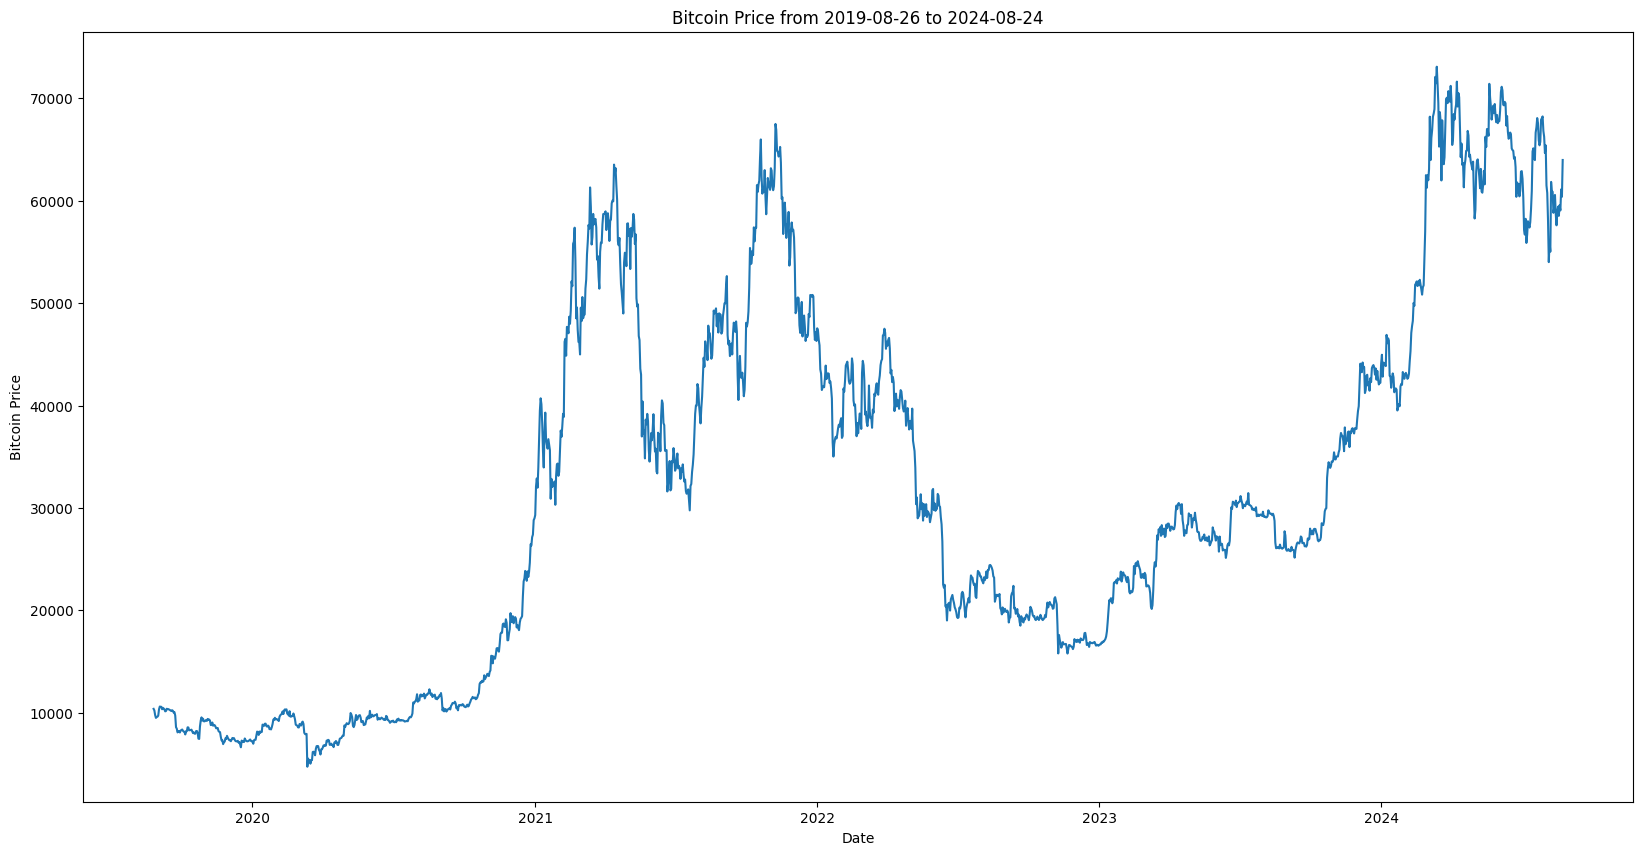

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(bitcoin_price)
plt.ylabel("Bitcoin Price")
plt.title("Bitcoin Price from 2019-08-26 to 2024-08-24")
plt.xlabel("Date")

plt.show()

In [95]:
bitcoin_price[:5]

,price
Start,
2019-08-26,10374.876617
2019-08-27,10219.413373
2019-08-28,9759.791528
2019-08-29,9493.755389
2019-08-30,9582.255358


In [96]:
timesteps = bitcoin_price.index.to_numpy()
prices = bitcoin_price['price'].to_numpy()

timesteps[:5], prices[:5]

(array(['2019-08-26T00:00:00.000000000', '2019-08-27T00:00:00.000000000',
        '2019-08-28T00:00:00.000000000', '2019-08-29T00:00:00.000000000',
        '2019-08-30T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([10374.87661724, 10219.41337325,  9759.79152841,  9493.75538921,
         9582.25535778]))

In [98]:
split = int(len(prices)  * 0.8)
split

1460

In [99]:
from os import X_OK
## Creating train and test datasets

# split = int(len(bitcoin_price)  * 0.8)
# split

X_train, y_train = timesteps[:split], prices[:split]
X_test, y_test = timesteps[split:], prices[split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(1460, 1460, 365, 365)

In [100]:
X_test.shape

(365,)

In [101]:
timesteps[:1]

array(['2019-08-26T00:00:00.000000000'], dtype='datetime64[ns]')

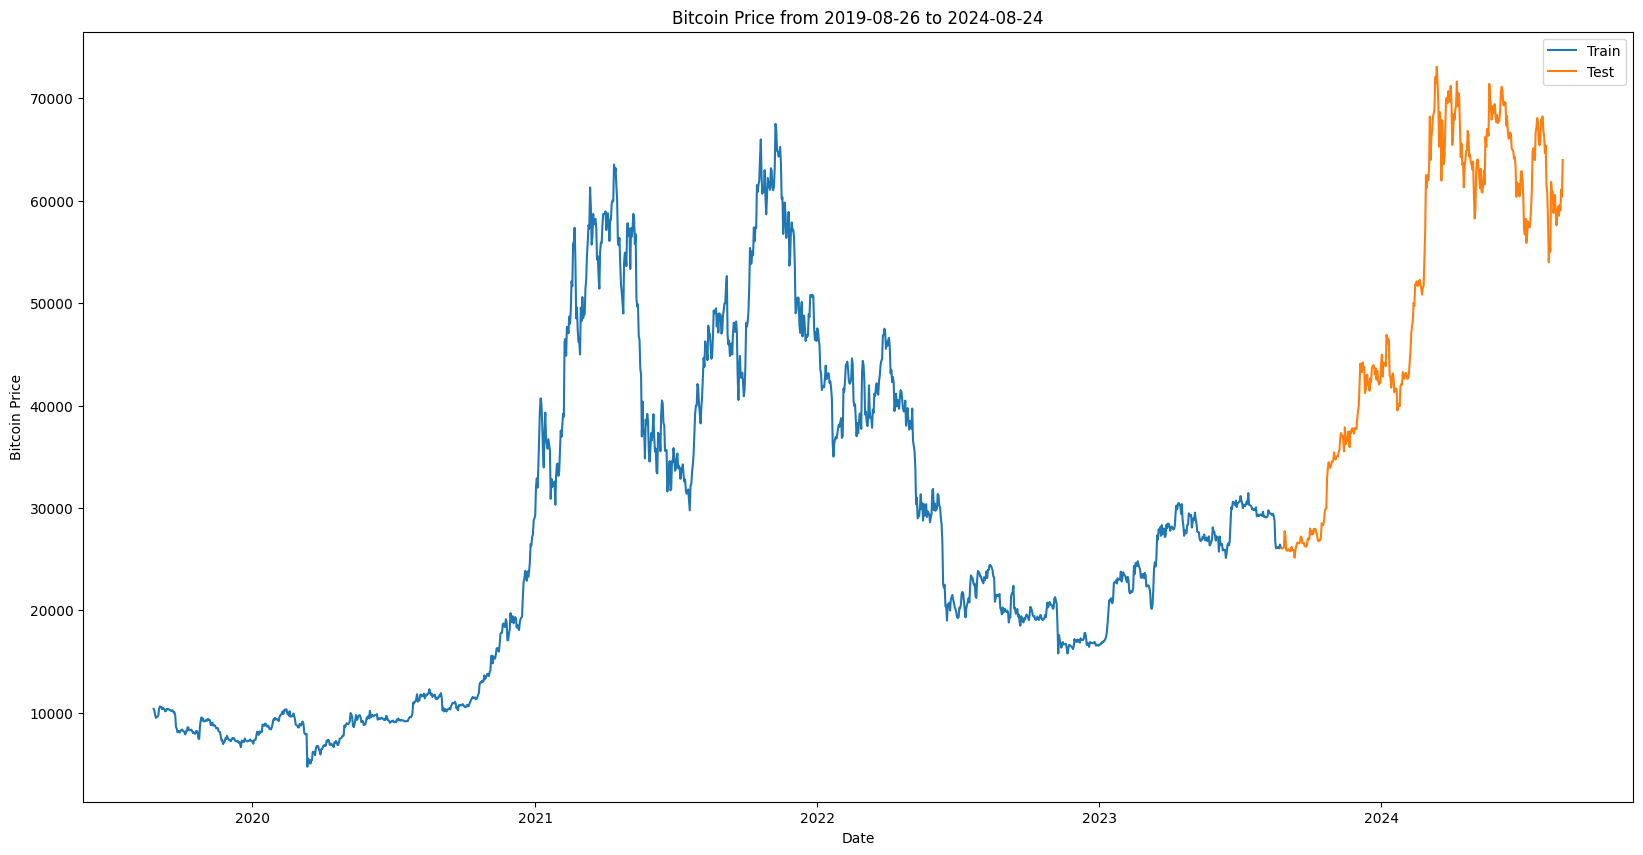

In [102]:
plt.figure(figsize=(20,10))
plt.plot(X_train, y_train)
plt.plot(X_test, y_test)
plt.legend(['Train', 'Test'])
plt.ylabel("Bitcoin Price")
plt.title("Bitcoin Price from 2019-08-26 to 2024-08-24")
plt.xlabel("Date")

plt.show()

In [103]:
## plot time series function to use later

def plot_time_series(timesteps, values, start=0, end=None, label=None ):

  plt.plot(timesteps[start:end], values[start:end])
  plt.xlabel("Time")
  plt.ylabel("Value")
  if label:
    plt.legend([label])
  plt.grid(True)

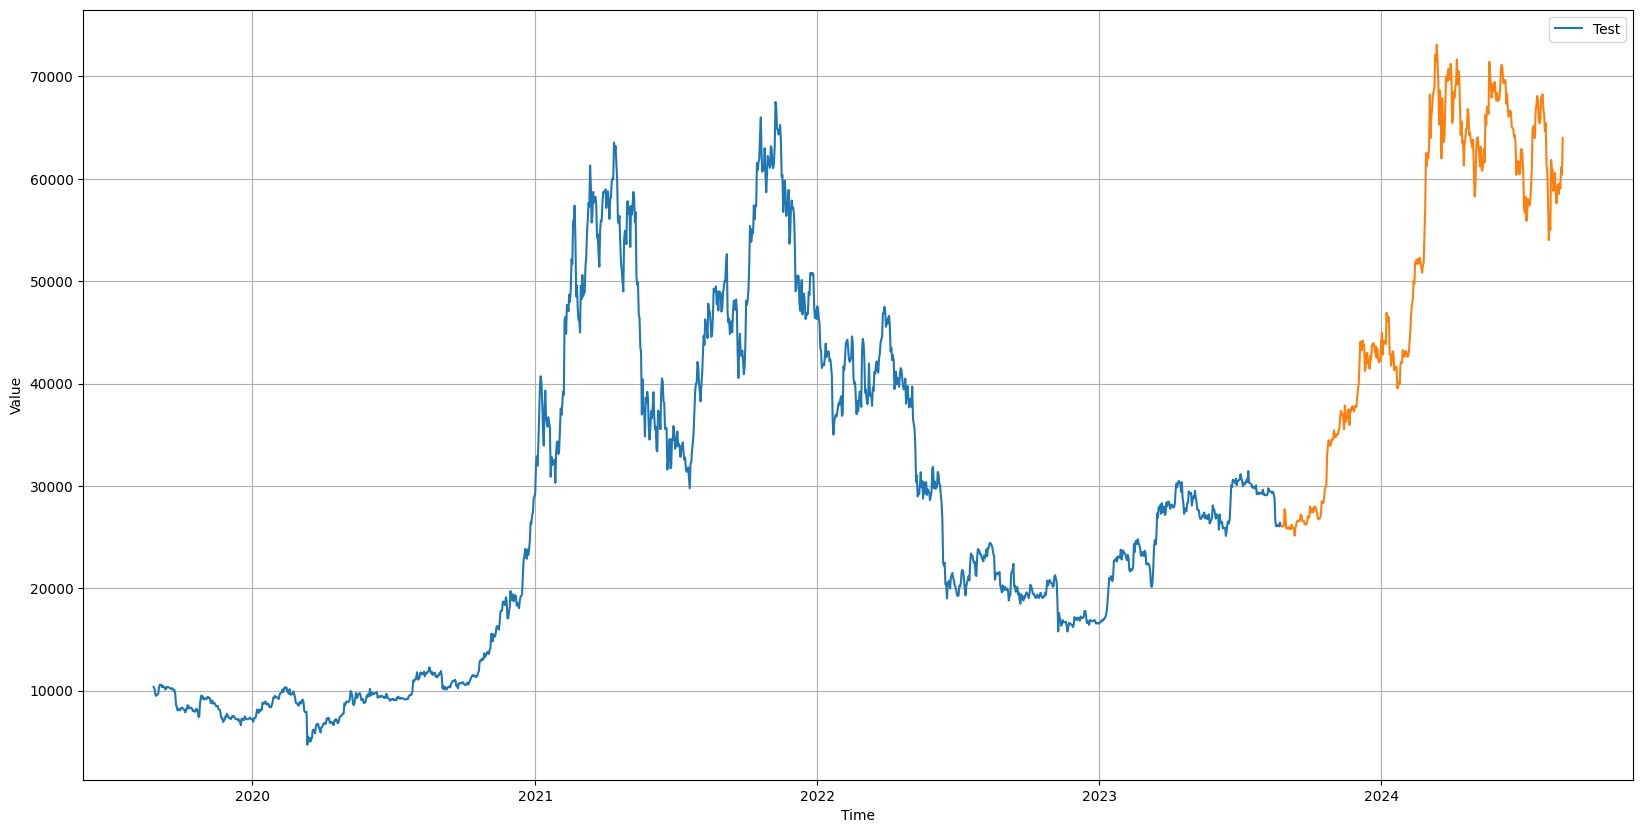

In [104]:
plt.figure(figsize=(20,10))
plot_time_series(timesteps=X_train, values = y_train, label='Train')
plot_time_series(timesteps=X_test, values = y_test, label='Test')

In [105]:
## Model 1: In this model, the prediction at time will be the value at time-1.

#

base_forecast = y_test[:-1]
base_forecast[:10]

array([26058.22, 26021.02, 26088.38, 26127.89, 27718.23, 27316.23,
       25936.45, 25816.57, 25856.93, 25980.6 ])

In [106]:
y_test[:10]

array([26058.22, 26021.02, 26088.38, 26127.89, 27718.23, 27316.23,
       25936.45, 25816.57, 25856.93, 25980.6 ])

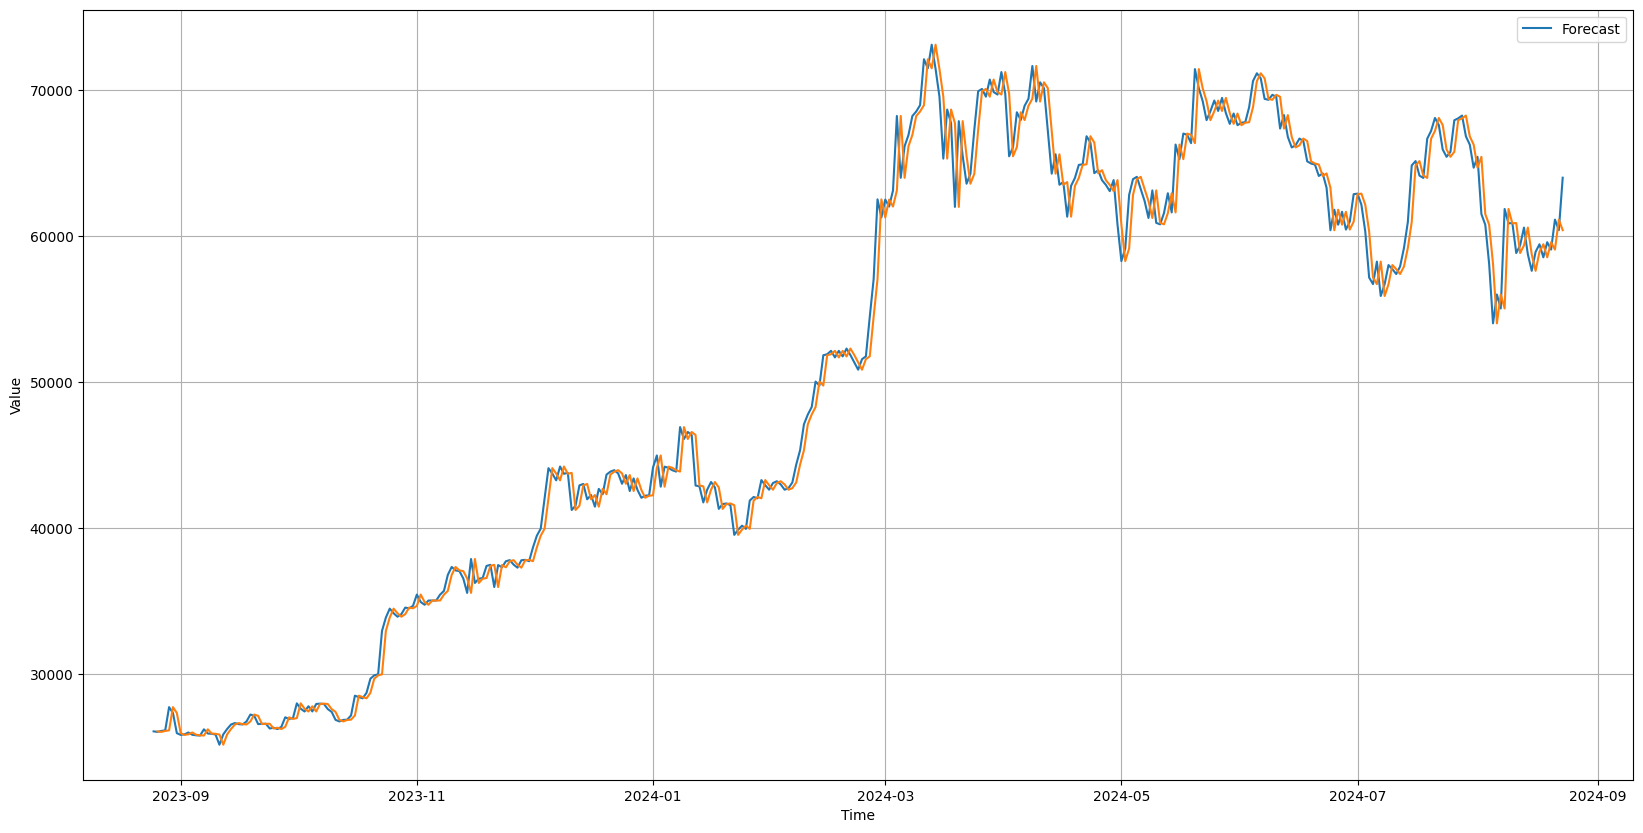

In [108]:
plt.figure(figsize=(20,10))
plot_time_series(timesteps=X_test, values = y_test, label='Test')
plot_time_series(timesteps=X_test[1:], values = base_forecast, label='Forecast')

In [109]:
import tensorflow as tf


#Regression metrics (which can also be used for time series forecasting):  lower is better.

# MAE - mean absolute error
# MSE - mean squared error
# RMSE - root mean square error
# MAPE/sMAPE - (symmetric) mean absolute percentage error


def evaluation(y_true, y_pred):

  mae_metric = tf.keras.metrics.MeanAbsoluteError()
  mae= mae_metric(y_true, y_pred)

  mse_metric = tf.keras.metrics.MeanSquaredError()
  mse = mse_metric(y_true, y_pred)

  rmse = tf.sqrt(mse)


  mape_metric = tf.keras.metrics.MeanAbsolutePercentageError()
  mape = mape_metric(y_true, y_pred)


  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "mape": mape.numpy()}


In [110]:
_base_forecast_evaluation = evaluation(y_test[1:], base_forecast)
_base_forecast_evaluation

{'mae': 996.01025, 'mse': 2205020.5, 'mape': 1.8600316}

In [114]:
## Updating the datasets to WINDOW and HORIZON

HORIZON = 1 # to predict one/next day
WINDOW = 7 # use the past seven days to predict Horizon


 ## Just trial on small data
def get_label_window(x, horizon=HORIZON):

  return x[:, :-horizon], x[:, -horizon:]

In [115]:
tf.range(8)

<tf.Tensor: shape=(8,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)>

In [116]:
fake_window, fake_label =  get_label_window(tf.expand_dims(tf.range(8), axis=0))
tf.squeeze(fake_window).numpy, tf.squeeze(fake_label).numpy

(<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(7,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6], dtype=int32)>>,
 <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=int32, numpy=7>>)

In [117]:
import numpy as np

window_size = 7
horizon = 1

window_step = window_size + horizon

np.arange(window_size + horizon)

window_step = np.expand_dims(np.arange(window_size + horizon),axis=0)  ## 2D
window_step

array([[0, 1, 2, 3, 4, 5, 6, 7]])

In [120]:
prices[:10], len(prices)

(array([10374.87661724, 10219.41337325,  9759.79152841,  9493.75538921,
         9582.25535778,  9609.78764737,  9716.72190969, 10329.85905157,
        10603.09546299, 10578.32020957]),
 1825)

In [124]:
window_index = window_step + np.expand_dims(np.arange(len(prices[:14]) - (window_size + horizon) - 1), axis=0).T

window_index

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 2,  3,  4,  5,  6,  7,  8,  9],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 4,  5,  6,  7,  8,  9, 10, 11]])

In [122]:
windows = prices[:14][window_index]
windows

array([[10374.87661724, 10219.41337325,  9759.79152841,  9493.75538921,
         9582.25535778,  9609.78764737,  9716.72190969, 10329.85905157],
       [10219.41337325,  9759.79152841,  9493.75538921,  9582.25535778,
         9609.78764737,  9716.72190969, 10329.85905157, 10603.09546299],
       [ 9759.79152841,  9493.75538921,  9582.25535778,  9609.78764737,
         9716.72190969, 10329.85905157, 10603.09546299, 10578.32020957],
       [ 9493.75538921,  9582.25535778,  9609.78764737,  9716.72190969,
        10329.85905157, 10603.09546299, 10578.32020957, 10574.499542  ],
       [ 9582.25535778,  9609.78764737,  9716.72190969, 10329.85905157,
        10603.09546299, 10578.32020957, 10574.499542  , 10339.45563157],
       [ 9609.78764737,  9716.72190969, 10329.85905157, 10603.09546299,
        10578.32020957, 10574.499542  , 10339.45563157, 10477.09483846],
       [ 9716.72190969, 10329.85905157, 10603.09546299, 10578.32020957,
        10574.499542  , 10339.45563157, 10477.09483846, 10

In [188]:
## Bitcoinn prices = turn them to (Window, Horizon) 2D array

def make_windows(x, window_size= WINDOW, horizon=HORIZON):

  window_step = np.expand_dims(np.arange(window_size + horizon),axis=0)

  window_index = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis=0).T

  windows = x[window_index]

  window, label = get_label_window(windows, horizon= horizon)

  return window, label

In [189]:
len(prices)

1825

In [192]:
all_windows, all_labels = make_windows(prices,window_size=window_size,horizon=horizon )

len(all_windows), len(all_labels)

(1818, 1818)

In [193]:
all_windows[1].shape, all_labels[1].shape

((7,), (1,))

In [194]:
for i in range(5):
  print(all_windows[i], all_labels[i])

[10374.87661724 10219.41337325  9759.79152841  9493.75538921
  9582.25535778  9609.78764737  9716.72190969] [10329.85905157]
[10219.41337325  9759.79152841  9493.75538921  9582.25535778
  9609.78764737  9716.72190969 10329.85905157] [10603.09546299]
[ 9759.79152841  9493.75538921  9582.25535778  9609.78764737
  9716.72190969 10329.85905157 10603.09546299] [10578.32020957]
[ 9493.75538921  9582.25535778  9609.78764737  9716.72190969
 10329.85905157 10603.09546299 10578.32020957] [10574.499542]
[ 9582.25535778  9609.78764737  9716.72190969 10329.85905157
 10603.09546299 10578.32020957 10574.499542  ] [10339.45563157]


In [130]:
### Getiing Test and Train Data

split = int(len(prices)  * 0.8)


X_train, y_train = all_windows[:split], all_labels[:split]
X_test, y_test = all_windows[split:], all_labels[split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(1460, 1460, 358, 358)

In [156]:
split

1460

In [131]:
len(all_windows), len(all_labels)


(1818, 1818)

In [132]:
X_train[:3], y_train[:3]

(array([[10374.87661724, 10219.41337325,  9759.79152841,  9493.75538921,
          9582.25535778,  9609.78764737,  9716.72190969],
        [10219.41337325,  9759.79152841,  9493.75538921,  9582.25535778,
          9609.78764737,  9716.72190969, 10329.85905157],
        [ 9759.79152841,  9493.75538921,  9582.25535778,  9609.78764737,
          9716.72190969, 10329.85905157, 10603.09546299]]),
 array([[10329.85905157],
        [10603.09546299],
        [10578.32020957]]))

In [133]:
X_test[:3], y_test[:3]

(array([[26058.22, 26021.02, 26088.38, 26127.89, 27718.23, 27316.23,
         25936.45],
        [26021.02, 26088.38, 26127.89, 27718.23, 27316.23, 25936.45,
         25816.57],
        [26088.38, 26127.89, 27718.23, 27316.23, 25936.45, 25816.57,
         25856.93]]),
 array([[25816.57],
        [25856.93],
        [25980.6 ]]))

In [134]:
## Create a checkpoint callback

import os

def checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name + ".keras"),
                                            monitor="val_loss",
                                            verbose=0,
                                            save_best_only=True)

In [135]:
## Model 2: with single dense layer (window=7, horizon=1), Adam opt, MAE loss function
from tensorflow.keras import layers
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    layers.Dense(units=128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_2")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_2.fit(x=X_train,
            y=y_train,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(X_test, y_test),
            callbacks=[checkpoint(model_name="model_2.name")])


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - loss: 20243.7188 - mae: 20243.7188 - mse: 583561216.0000 - val_loss: 7841.0796 - val_mae: 7841.0796 - val_mse: 74316856.0000
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3235.8535 - mae: 3235.8535 - mse: 20524462.0000 - val_loss: 5336.2100 - val_mae: 5336.2100 - val_mse: 40382708.0000
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2208.0342 - mae: 2208.0342 - mse: 10431595.0000 - val_loss: 3100.3037 - val_mae: 3100.3037 - val_mse: 15903836.0000
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1747.4385 - mae: 1747.4385 - mse: 7283318.5000 - val_loss: 2258.2366 - val_mae: 2258.2366 - val_mse: 9605450.0000
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1582.2189 - mae: 1582.2189 - mse: 6022294.0000 - val_loss: 2208.5017 - val_mae: 2208.5017 - val_mse: 9161305.0000
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1525.2428 - mae: 1525.2428 - mse: 5728048.5000 - val_loss: 2160.5

In [136]:
model_2.evaluate(X_test, y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 969.5830 - mae: 969.5830 - mse: 1923104.5000


[1239.48291015625, 1239.48291015625, 2921125.5]

In [137]:
## Loading the best model

model_2 = tf.keras.models.load_model("model_experiments/model_2.name.keras")
model_2.evaluate(X_test, y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 795.3420 - mae: 795.3420 - mse: 1551993.2500


[1070.7581787109375, 1070.7581787109375, 2450159.0]

In [138]:
## Make a prediction

forecast = model_2.predict(X_test)
forecast.shape

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


(358, 1)

In [139]:
forecast[:10]

array([[26281.072],
       [25883.521],
       [25888.627],
       [25715.28 ],
       [25561.584],
       [25600.674],
       [25673.842],
       [25940.254],
       [25886.006],
       [25761.068]], dtype=float32)

In [140]:
X_test.shape

(358, 7)

In [141]:
tf.squeeze(X_test).shape

TensorShape([358, 7])

In [142]:
model_2_evaluation = evaluation(y_test, forecast)
model_2_evaluation

{'mae': 1070.758, 'mse': 2450159.0, 'mape': 2.0074975}

In [143]:
_base_forecast_evaluation

{'mae': 996.01025, 'mse': 2205020.5, 'mape': 1.8600316}

In [144]:
timesteps[:1]

array(['2019-08-26T00:00:00.000000000'], dtype='datetime64[ns]')

In [145]:
len(timesteps[1:])

1824

In [146]:
len(X_test), len(X_train), len(y_test), len(timesteps)

(358, 1460, 358, 1825)

In [147]:
X_test.shape

(358, 7)

In [150]:
timesteps.shape, bitcoin_price.shape

((1825,), (1825, 1))

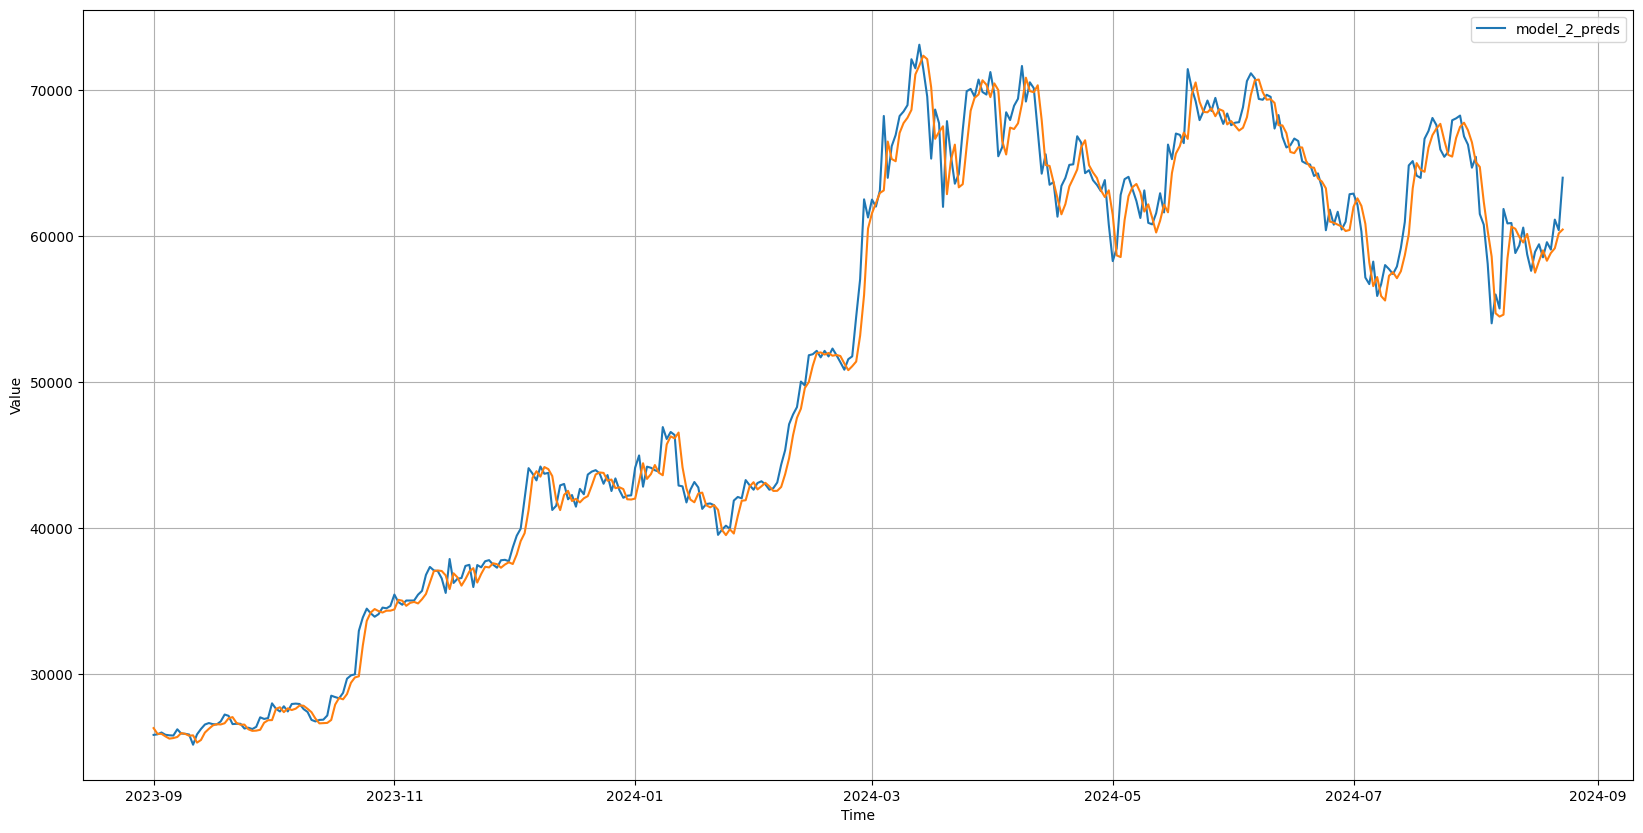

In [152]:
## Ploting the model_2 prediction

plt.figure(figsize=(20,10))
plot_time_series(timesteps= timesteps[1467:], values= bitcoin_price[1467:] ,label="Test")

plot_time_series(timesteps= timesteps[1467:],
                values= forecast,
                label="model_2_preds")

## Model 3:  Same model as Model 2 but 30 days window size and 1 day horizo


In [153]:
HORIZON = 1
WINDOW = 30

all_window, all_label = make_windows(prices, window_size=WINDOW, horizon=HORIZON)

len(all_window), len(all_label), len(prices)

(1795, 1795, 1825)

In [155]:
split, all_window[1].shape, all_label[1].shape

(1460, (30,), (1,))

In [157]:
## Train and test data

train_window , test_window, train_label, test_label = all_windows[:split], all_windows[split:], all_labels[:split], all_labels[split:]

len(train_window), len(test_window), len(train_label), len(test_label)

(1460, 358, 1460, 358)

In [158]:
train_window[:3], train_label[:3]

(array([[10374.87661724, 10219.41337325,  9759.79152841,  9493.75538921,
          9582.25535778,  9609.78764737,  9716.72190969],
        [10219.41337325,  9759.79152841,  9493.75538921,  9582.25535778,
          9609.78764737,  9716.72190969, 10329.85905157],
        [ 9759.79152841,  9493.75538921,  9582.25535778,  9609.78764737,
          9716.72190969, 10329.85905157, 10603.09546299]]),
 array([[10329.85905157],
        [10603.09546299],
        [10578.32020957]]))

In [159]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    layers.Dense(units=128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_3")

model_3.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_3.fit(x=train_window, y=train_label,
            epochs=100,
            batch_size=32,
            verbose=0,
            validation_data=(test_window, test_label),
            callbacks=[checkpoint(model_name="model_3.name")])

In [160]:
model_3.evaluate(test_window, test_label)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1098.5280 - mae: 1098.5280 - mse: 2227704.0000


[1373.8927001953125, 1373.8927001953125, 3342459.0]

In [161]:
model_3= tf.keras.models.load_model("model_experiments/model_3.name.keras")
model_3.evaluate(test_window, test_label)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 818.0077 - mae: 818.0077 - mse: 1566766.8750


[1079.4327392578125, 1079.4327392578125, 2439819.0]

In [162]:
model_3_forecast = model_3.predict(test_window)
model_3_forecast.shape, tf.squeeze(test_window).shape


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


((358, 1), TensorShape([358, 7]))

In [163]:
model_3_evaluation = evaluation(test_label, model_3_forecast)
model_3_evaluation

{'mae': 1079.4327, 'mse': 2439819.0, 'mape': 2.0337942}

In [164]:
model_2_evaluation

{'mae': 1070.758, 'mse': 2450159.0, 'mape': 2.0074975}

In [165]:
timesteps.shape, bitcoin_price.shape

((1825,), (1825, 1))

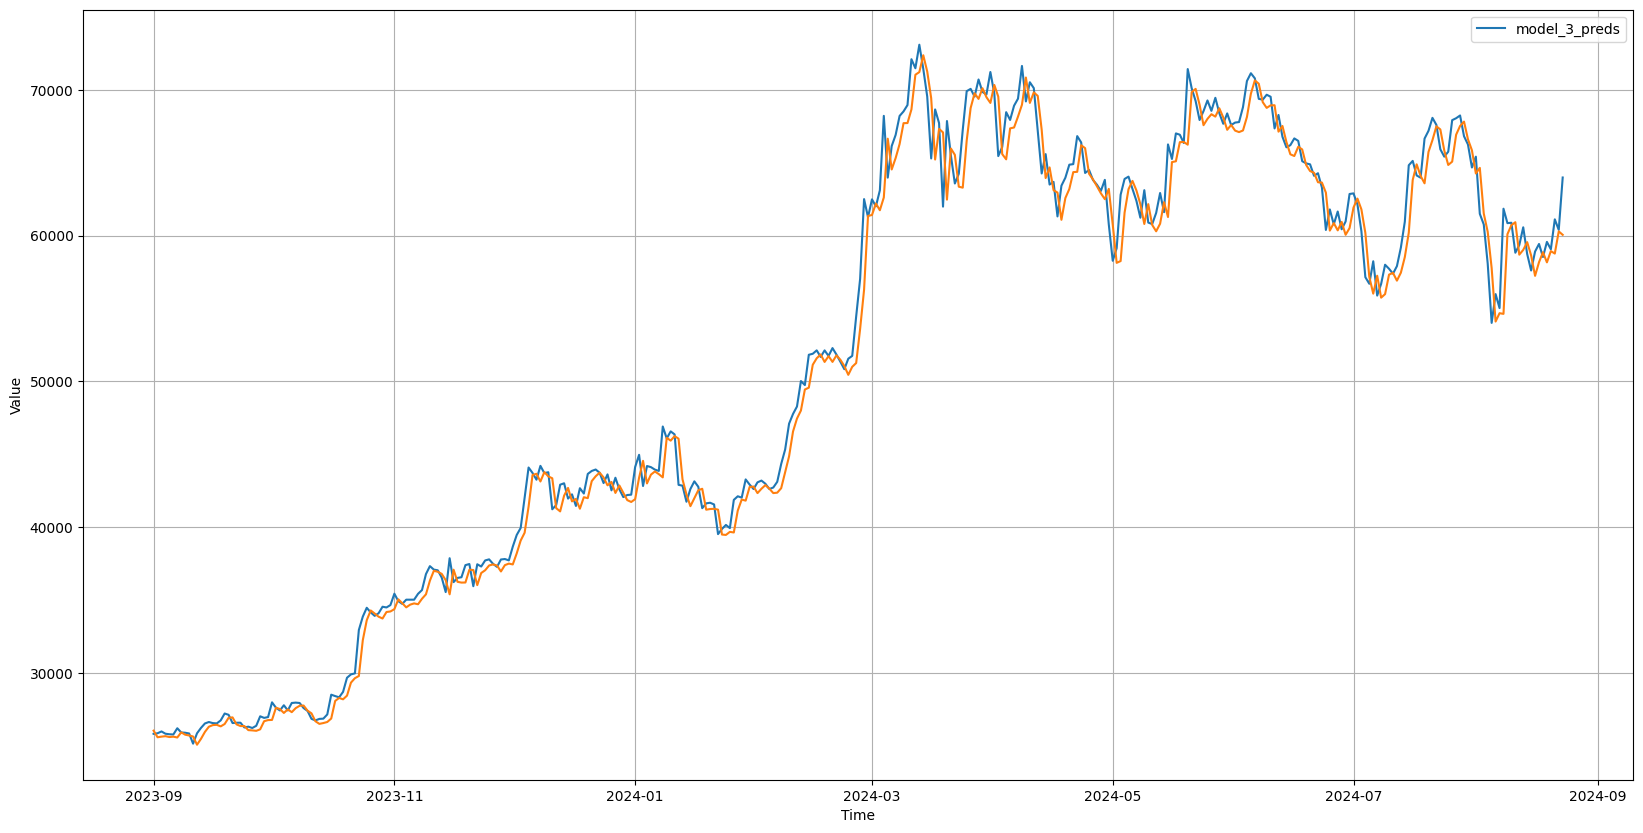

In [168]:
## Ploting the model_3 prediction

plt.figure(figsize=(20,10))
plot_time_series(timesteps= timesteps[1467:], values= bitcoin_price[1467:] ,label="Test")

plot_time_series(timesteps= timesteps[1467:],
                values= model_3_forecast,
                label="model_3_preds")

## Model 4: Window=30 and horizon=7

In [169]:
prices[:3], prices[-3:]

(array([10374.87661724, 10219.41337325,  9759.79152841]),
 array([61109.99, 60386.02, 63979.97]))

In [170]:
bitcoin_price[:3]

,price
Start,
2019-08-26,10374.876617
2019-08-27,10219.413373
2019-08-28,9759.791528


In [180]:
HORIZON = 7
WINDOW = 30

In [181]:
import numpy as np

def make_windows(x, window_size=WINDOW, horizon=HORIZON):


  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)


  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T

  windowed_array = x[window_indexes]

  windows, labels = get_label_window(windowed_array, horizon=horizon)
  return windows, labels

In [182]:
HORIZON = 7
WINDOW = 30

all_window, all_label = make_windows(prices, window_size=30, horizon=7)

len(all_window), len(all_label), len(prices)

(1789, 1789, 1825)

In [183]:
all_window[1], all_label[1]

(array([10219.41337325,  9759.79152841,  9493.75538921,  9582.25535778,
         9609.78764737,  9716.72190969, 10329.85905157, 10603.09546299,
        10578.32020957, 10574.499542  , 10339.45563157, 10477.09483846,
        10410.18764404, 10322.05760789, 10132.54480456, 10159.72047332,
        10387.51484121, 10346.59919496, 10353.54979822, 10313.44352598,
        10268.65798496, 10208.16581794, 10164.10190487, 10241.60879539,
        10179.86223084, 10006.06533083, 10050.18754113,  9719.39701861,
         8588.42490586,  8439.8461899 ]),
 array([8077.93635444, 8183.56987236, 8208.59598768, 8068.66873829,
        8269.02868158, 8294.74359665, 8361.91923314]))

In [184]:
all_label[1], all_label[1].shape, all_window[1].shape

(array([8077.93635444, 8183.56987236, 8208.59598768, 8068.66873829,
        8269.02868158, 8294.74359665, 8361.91923314]),
 (7,),
 (30,))

In [71]:
train_window , test_window, train_label, test_label = all_windows[split:], all_windows[:split], all_labels[split:], all_labels[:split]

len(train_window), len(test_window), len(train_label), len(test_label)

(1453, 365, 1453, 365)

In [73]:
train_window.shape, train_label.shape, test_window.shape, test_label.shape

((1453, 7), (1453,), (365, 7), (365,))

In [195]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    layers.Dense(units=128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_4")

model_4.compile(loss="MAE",
                optimizer = tf.keras.optimizers.Adam())

model_4.fit(train_window,
            train_label,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_window, test_label),
            callbacks=[checkpoint(model_name="model_4.name")])



In [196]:
model_4.evaluate(test_window, test_label)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 784.7385


1057.3902587890625

In [198]:
model_4 = tf.keras.models.load_model("model_experiments/model_4.name.keras")
model_4.evaluate(test_window, test_label)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 784.7385


1057.3902587890625

In [199]:
model_4.predict(test_window)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[26509.393, 26376.152, 26324.422, ..., 26385.33 , 26091.264,
        26371.5  ],
       [26246.611, 26143.016, 25936.717, ..., 26130.266, 26059.086,
        25981.645],
       [25873.25 , 25727.957, 25739.65 , ..., 25762.086, 25828.19 ,
        25665.453],
       ...,
       [59016.36 , 59164.63 , 59012.35 , ..., 58780.758, 59051.11 ,
        58761.215],
       [60347.188, 60426.902, 60403.406, ..., 60278.367, 60626.844,
        60115.273],
       [60232.703, 60659.863, 60423.305, ..., 60177.86 , 60475.29 ,
        60055.117]], dtype=float32)

In [200]:
model_4_forecast = model_4.predict(test_window)
model_4_forecast.shape, tf.squeeze(test_window).shape

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


((358, 7), TensorShape([358, 7]))

In [203]:
model_4_evaluation = evaluation(test_label, model_4_forecast)
model_4_evaluation

{'mae': 1057.3901, 'mse': 2441604.5, 'mape': 1.9810569}

In [202]:
model_3_evaluation, model_2_evaluation

({'mae': 1079.4327, 'mse': 2439819.0, 'mape': 2.0337942},
 {'mae': 1070.758, 'mse': 2450159.0, 'mape': 2.0074975})

##  Model 5 : Conv1